In [1]:
%run 00_analysis_config.ipynb

Welcome to JupyROOT 6.24/06


In [2]:
# modules in this directory
import visualization, util, event, cutflow, detector
importlib.reload(event)
importlib.reload(visualization)
importlib.reload(util)
importlib.reload(detector)
import visualization as vis


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [32]:
import lsfit
reload(lsfit)
from lsfit import *

import include_modules_root as rt
import Kalman_tom

In [4]:
# Figure configuration are saved in this file include_figure_preset.py
from include_figure_preset import * 
# Set Figure font family, fontsize, ticks, etc.
plt_config(family="san-serif", fontsize_multi=1) # or "serif", or an exact font name

# Redefine a function to save figures with common settings 
fig_prefix = "plots/singletrack_"    # It's good to keep figures in a separate folder. Can also be set to None.
fig_format = "jpg"      # for multiple formats, e.g.: "pdf,png"
SAVE_FIG = False         # Use this flag to turn the figure saving on or off, so that you don't need to modify all notebook to save figure.
# You can then do `savefig(filename_without_extension)` to save your plots with these settings
savefig = Save_fig(fig_prefix=fig_prefix, exts=fig_format, SAVE= SAVE_FIG, dpi=300)

## Input file, output filenames, etc

In [40]:
# DATA_DIR    = "/project/def-mdiamond/tomren/mathusla/data/fit_study"
# files=glob.glob(f"{DATA_DIR}/pion_10_GeV/*/*/stat0.root",)
files=glob.glob(f"{DATA_DIR}/pion_0.5_GeV/*/*/stat0.root",)
# files=glob.glob(f"{DATA_DIR}/muon_1000_GeV/*/*/stat0.root",)
print(files)
file_prefix=os.path.dirname(files[0])
tree_name="integral_tree"

filename = files[0]
filename_ref = os.path.dirname(filename)+"/stat_seedmod.root"
res_ls = joblib.load( os.path.dirname(filename)+"/ls_fit.joblib")

['/project/def-mdiamond/tomren/mathusla/data/fit_study/pion_0.5_GeV/20230411/185206/stat0.root']


In [42]:
results_fit = {}    
lsfit.get_km(filename, results_fit, tree_name)

results_fit_ref = {}    
lsfit.get_km(filename_ref, results_fit_ref, tree_name)

100%|██████████| 40000/40000 [00:17<00:00, 2293.30it/s]


In [47]:
results_fit = {}    
lsfit.get_km(filename, results_fit, tree_name)

100%|██████████| 40000/40000 [00:15<00:00, 2520.59it/s]


Text(0.5, 0, 'Track chi2')

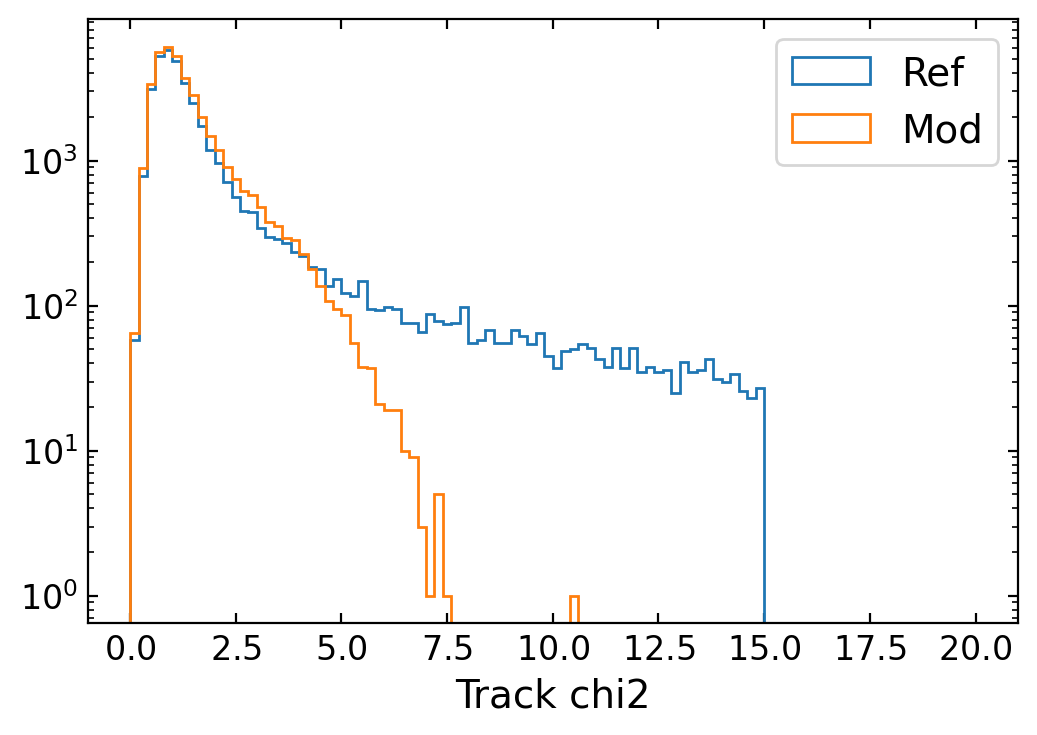

In [48]:
hist(results_fit_ref["par_km_chi2"],range=(0,20),log=1,histtype="step",label="Ref");
hist(results_fit["par_km_chi2"],range=(0,20),log=1,histtype="step",label="Mod");
legend()
xlabel("Track chi2")

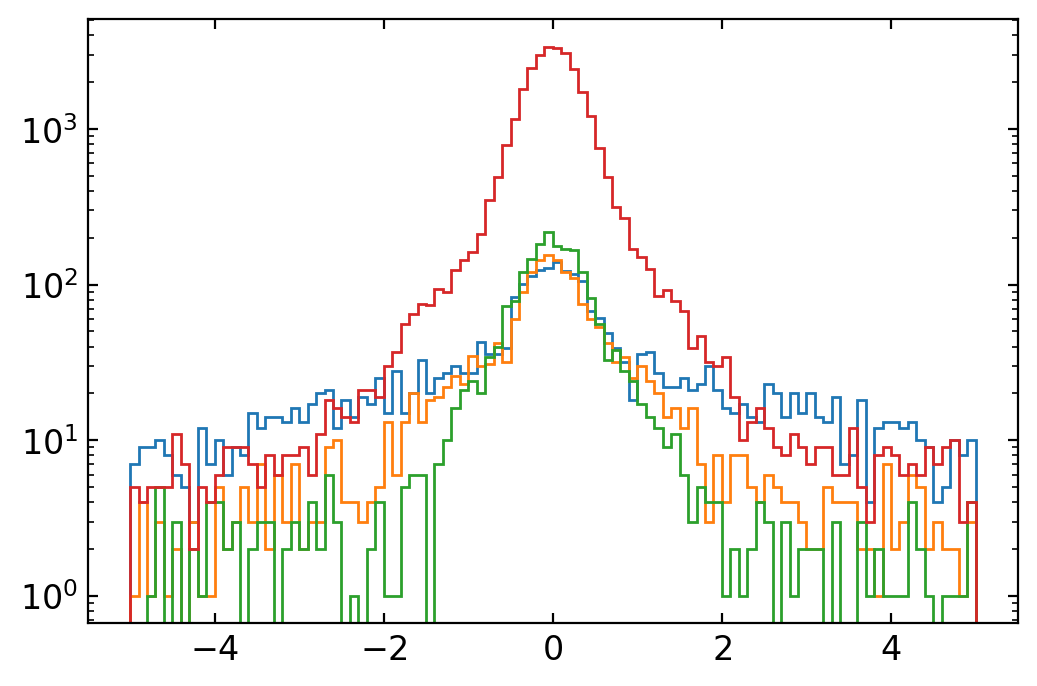

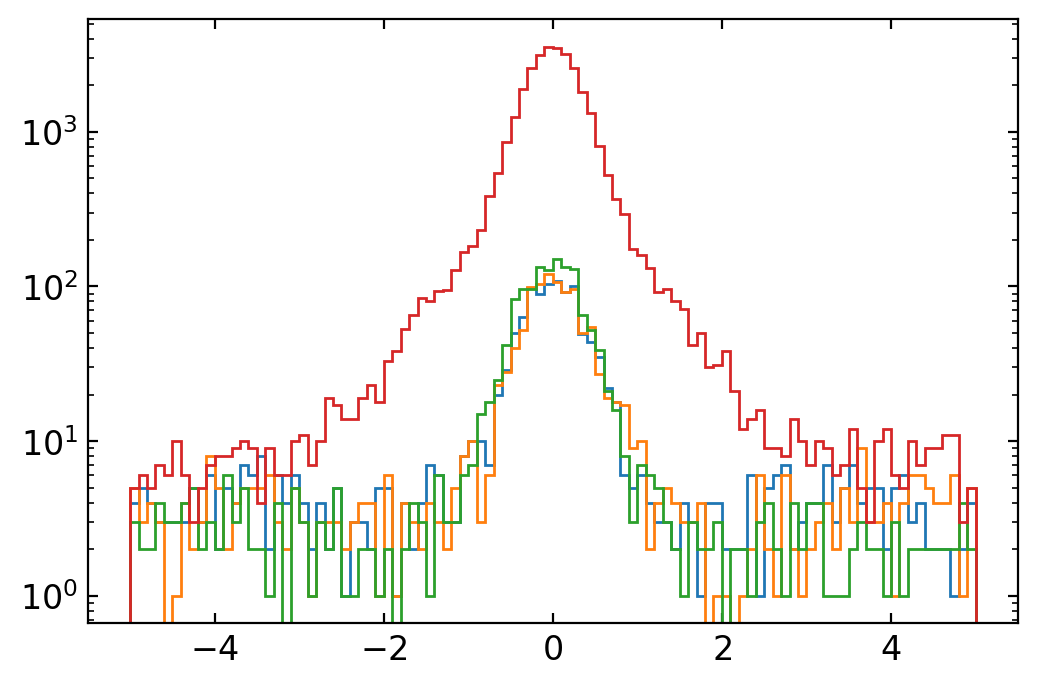

In [49]:
ipar = 3
residual_kf=results_fit["par_km"][:,inds_ipar[ipar]]-results_fit["par_km_truth"][:,inds_ipar[ipar]]
# scatter(residual_kf, results_fit["par_km_ndigitrack"],s=1,alpha=0.1);
for i in range(4,8):
    mask = results_fit["par_km_ndigitrack"]==i
    hist(residual_kf[mask],bins=100,range=(-5,5),histtype="step")
yscale("log")
show()

residual_kf=results_fit_ref["par_km"][:,inds_ipar[ipar]]-results_fit_ref["par_km_truth"][:,inds_ipar[ipar]]
# scatter(residual_kf, results_fit["par_km_ndigitrack"],s=1,alpha=0.1);
for i in range(4,8):
    mask = results_fit_ref["par_km_ndigitrack"]==i
    hist(residual_kf[mask],bins=100,range=(-5,5),histtype="step")
yscale("log")

KF ref 35965 0.9698252615683314
KF mod 37555 0.9810093516535187
LS ref 33899 0.916783859800952


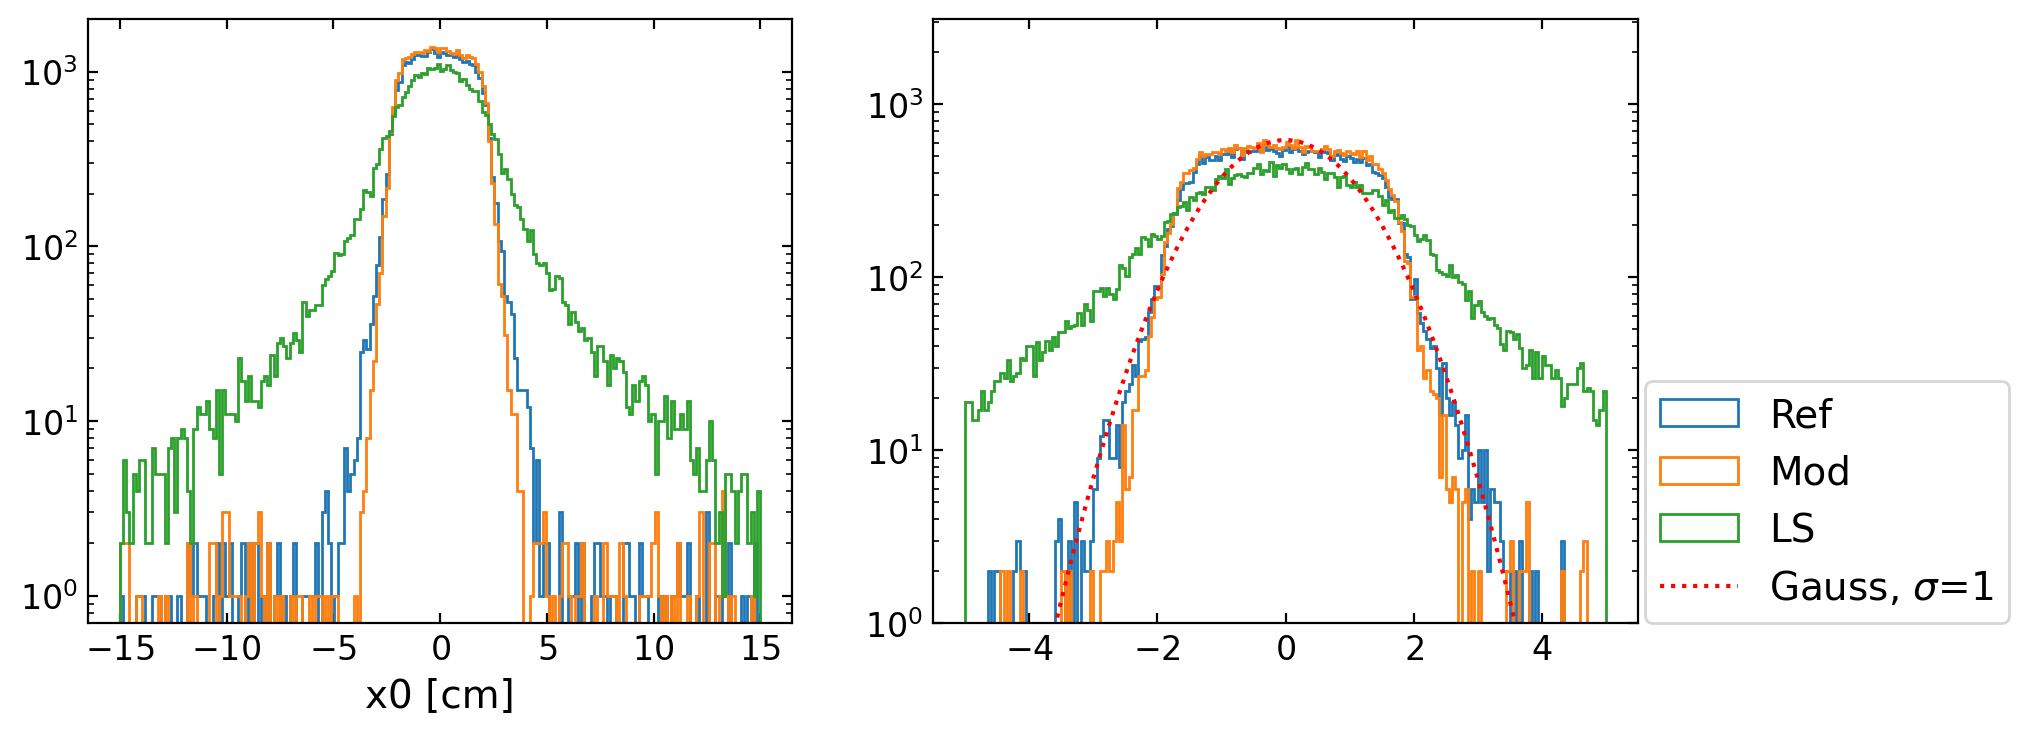

KF ref 31796 0.8574048107000324
KF mod 32863 0.8584452222976856
LS ref 31103 0.8411672436174816


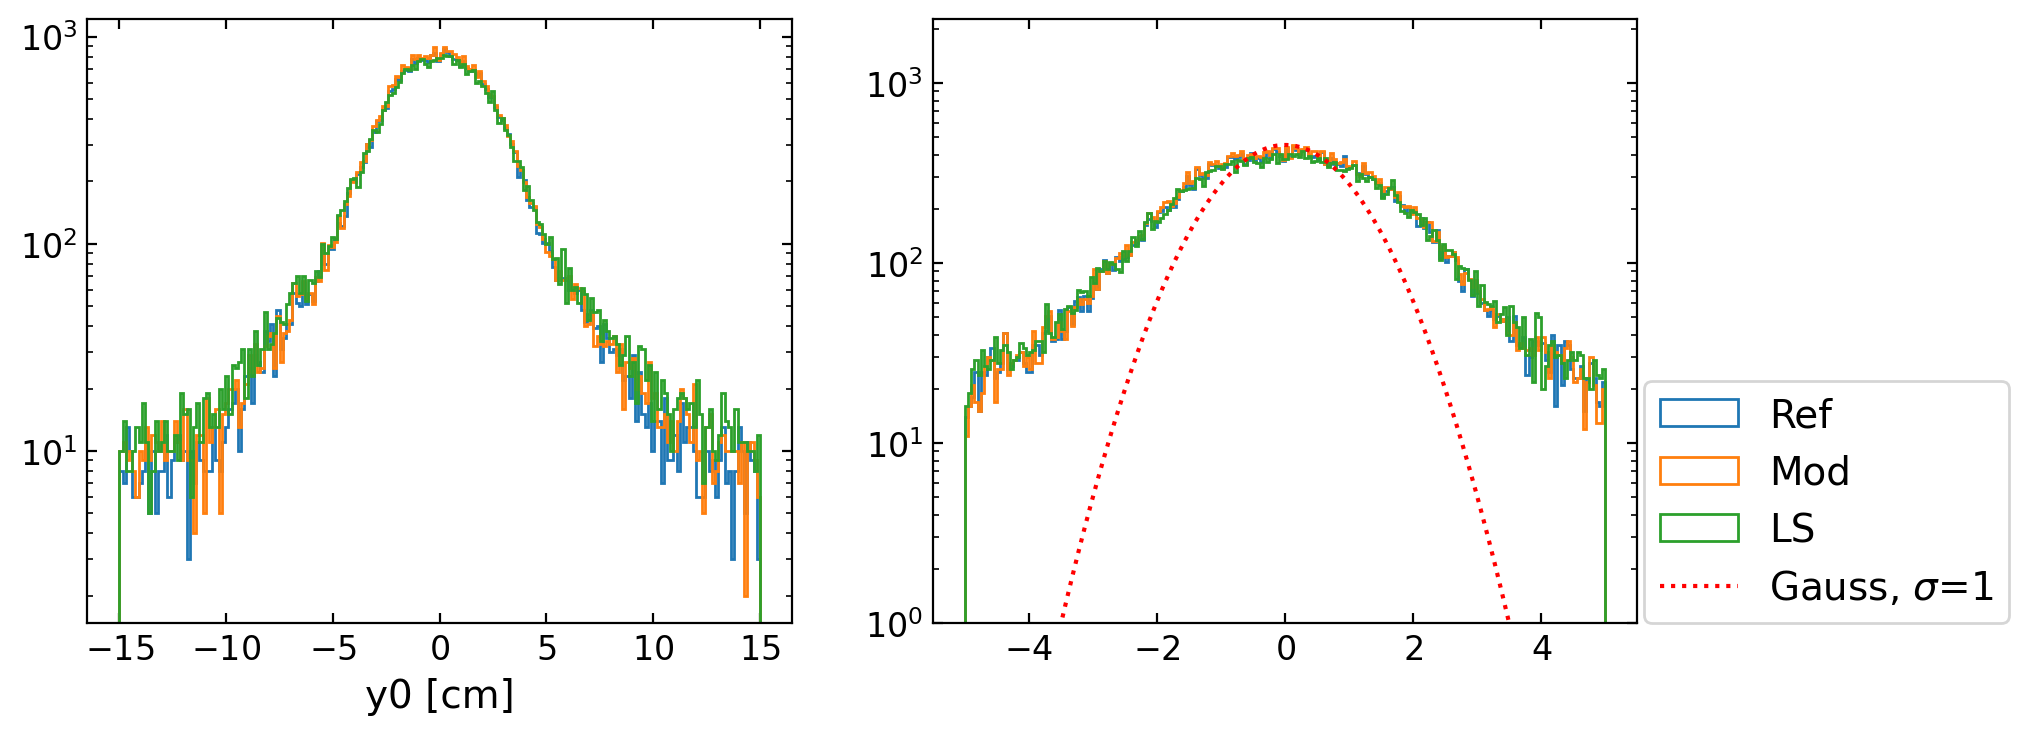

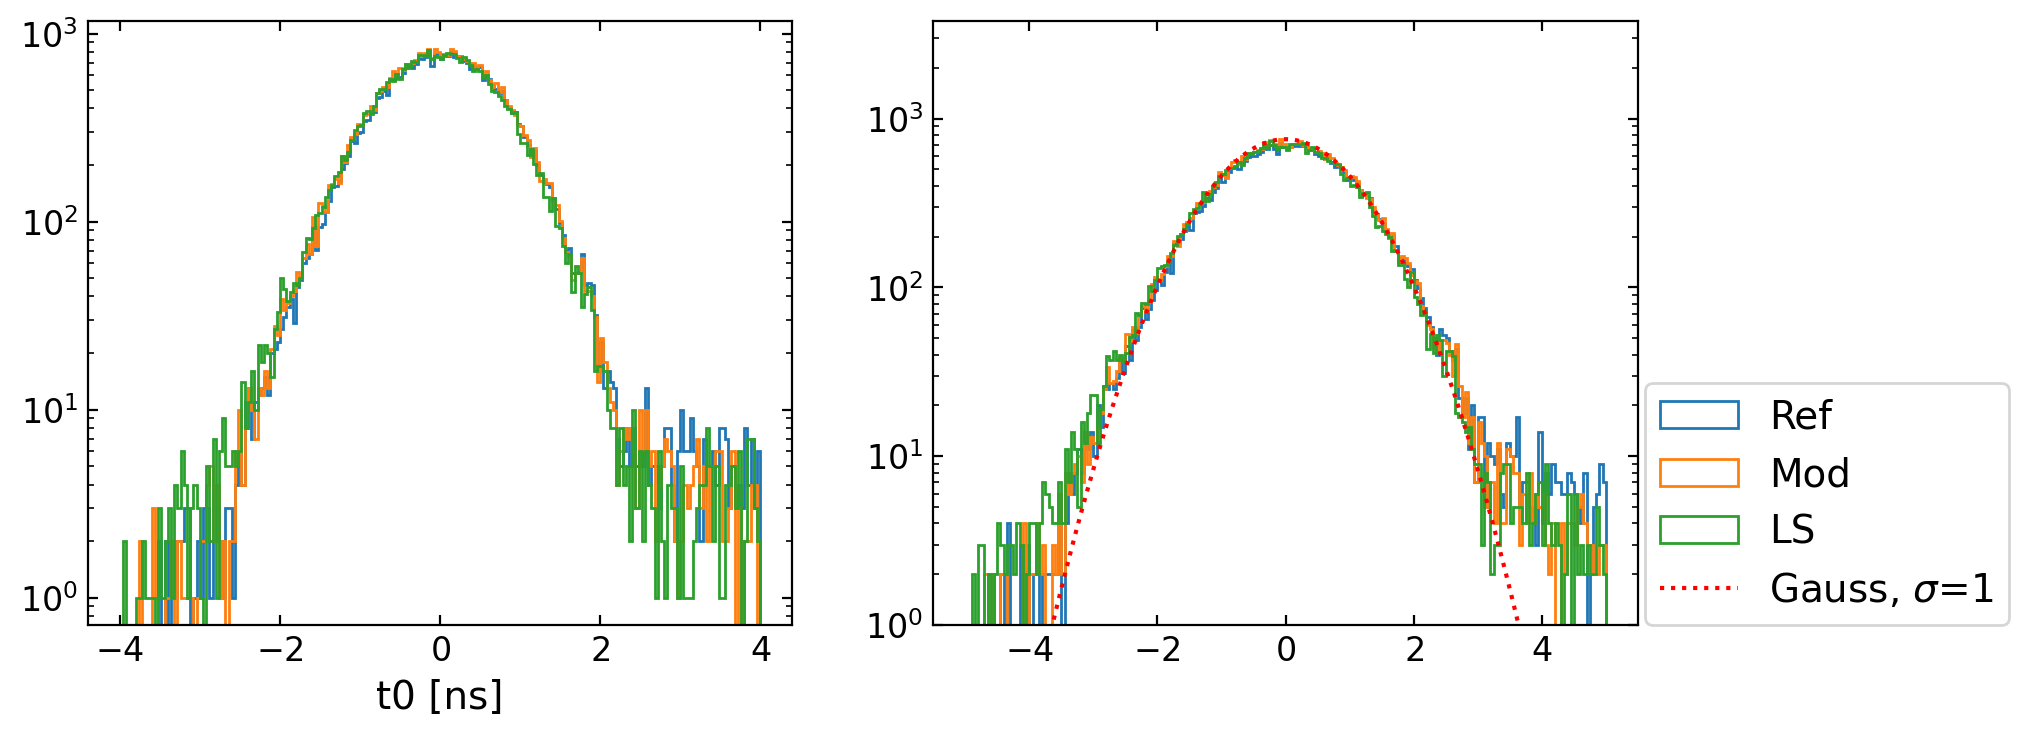

KF ref 27505 0.7416945313342681
KF mod 27133 0.7087665221252808
LS ref 24277 0.6565610125486803


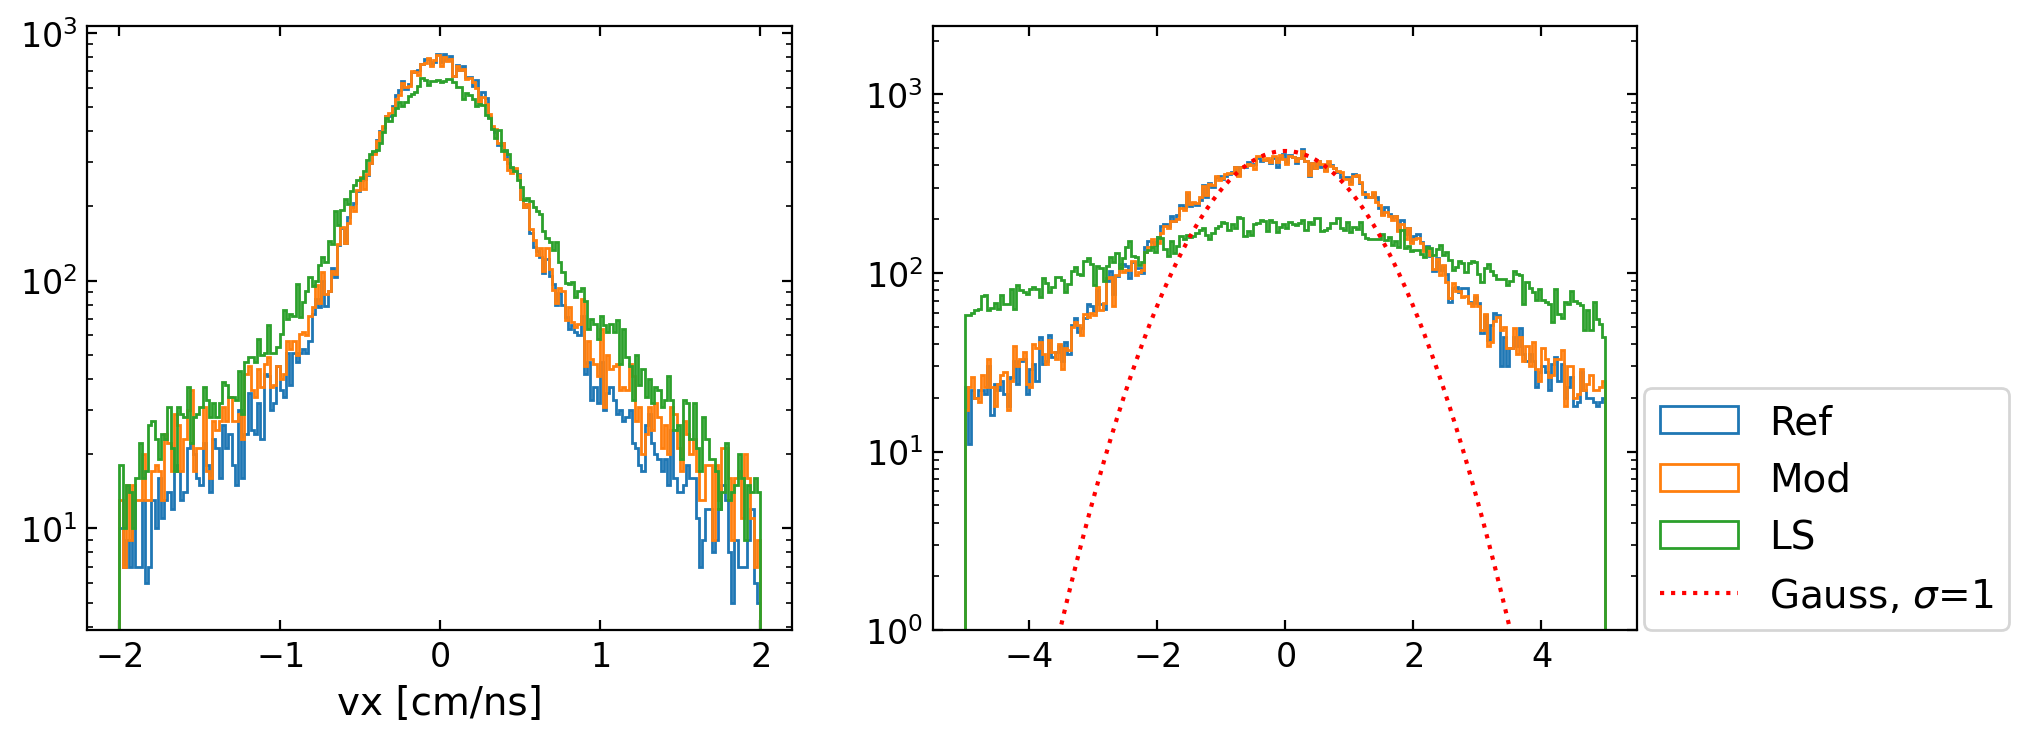

KF ref 23456 0.6325099773487218
KF mod 23932 0.6251502011389165
LS ref 23716 0.6413890090869754


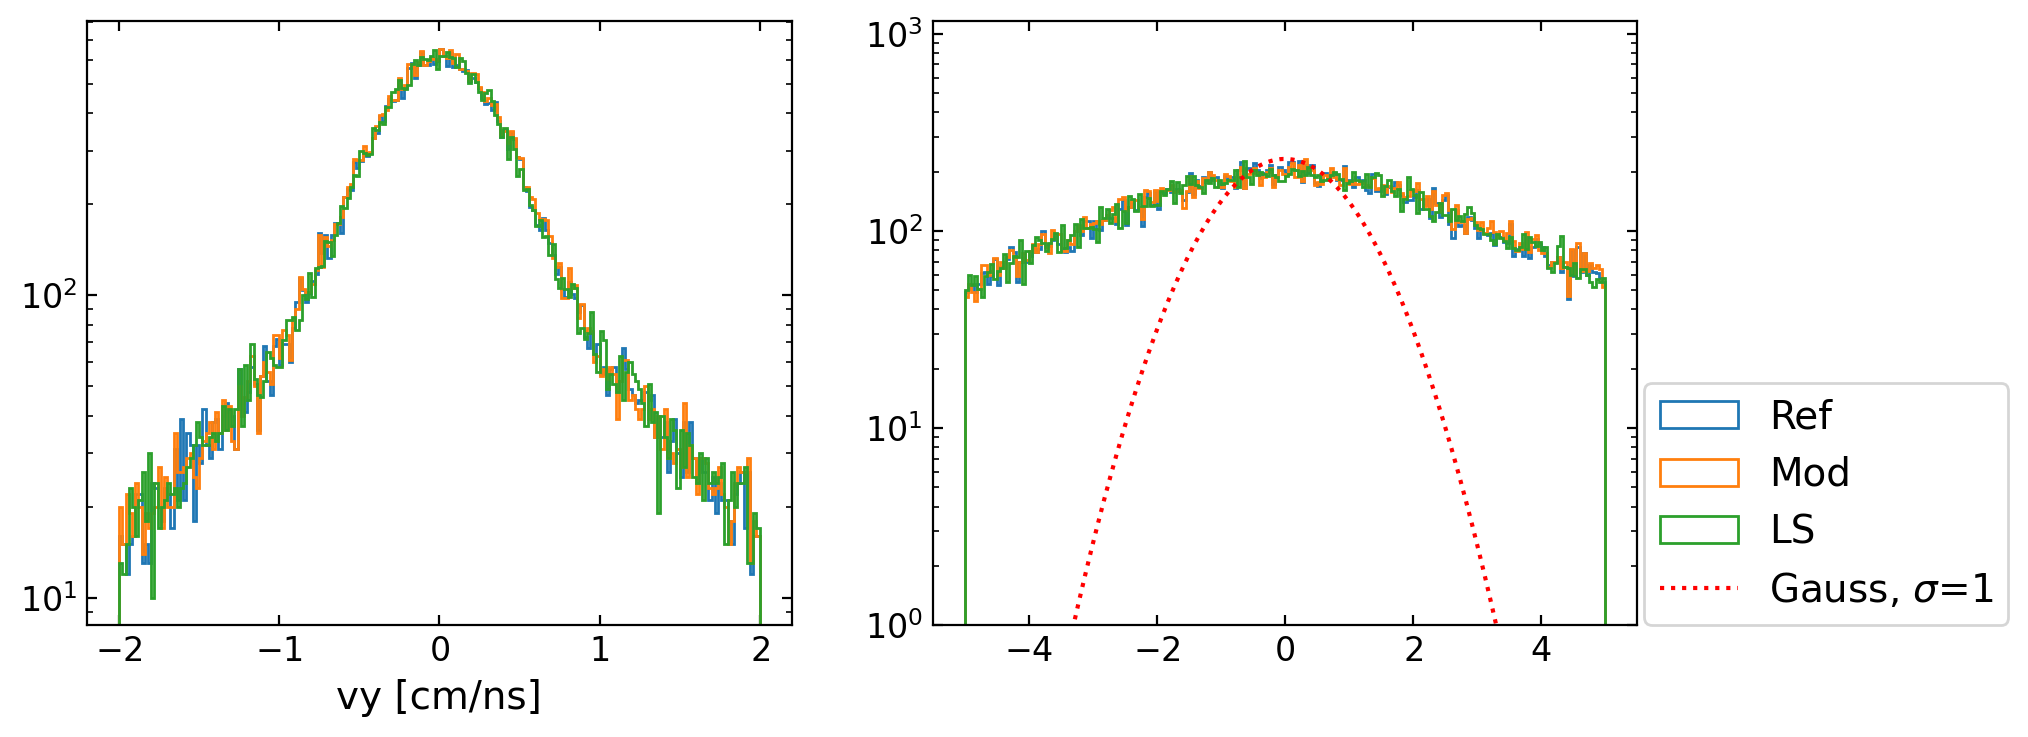

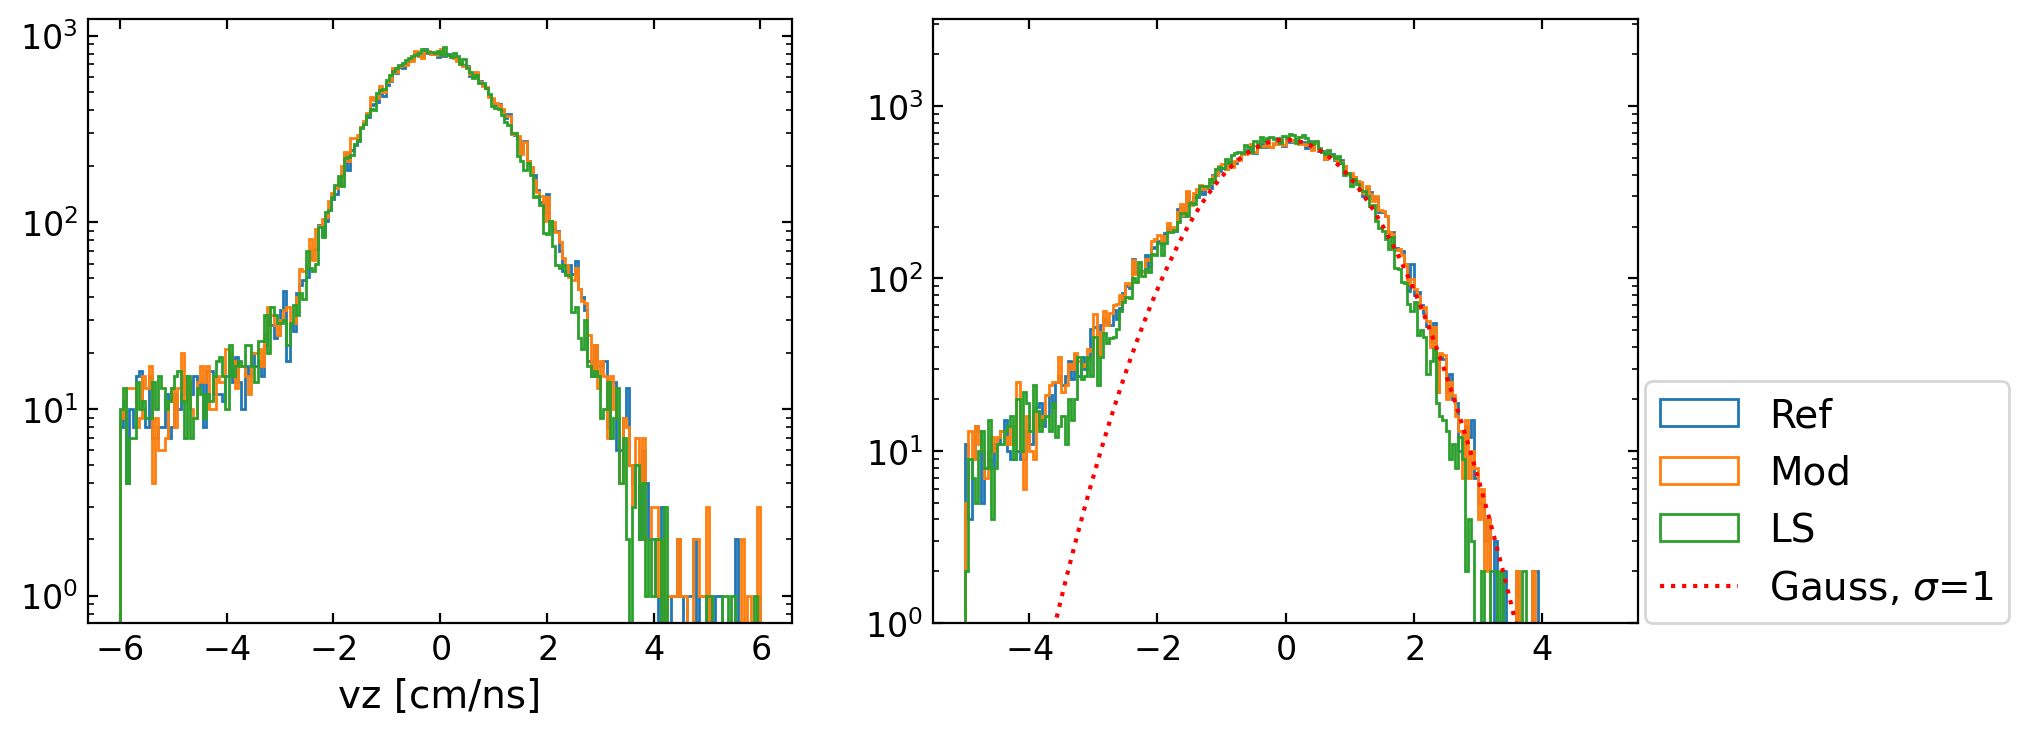

New eff 0.6388 N passed 25552
Ref eff 0.638825 N passed 25553


In [50]:
ipar = 4

inds_ipar = [2,0,3,6,4,5]
ind_ls=[0,1,3,4,5,6]
axlabels=["x0 [cm]","y0 [cm]", "t0 [ns]", "vx [cm/ns]", "vy [cm/ns]", "vz [cm/ns]"]
ranges=np.array([[-15,15],[-15,15],[-4,4],[-2,2], [-2,2], [-6,6]])

masks = []
masks_ref = []
for ipar in range(6):

    residual_kf=results_fit["par_km"][:,inds_ipar[ipar]]-results_fit["par_km_truth"][:,inds_ipar[ipar]]
    residual_kf_ref=results_fit_ref["par_km"][:,inds_ipar[ipar]]-results_fit_ref["par_km_truth"][:,inds_ipar[ipar]]

    mask_recon_success=res_ls["mask_recon_success"]
    recon     =np.array(res_ls["recon_ls"])[mask_recon_success]
    recon_unc =np.array(res_ls["recon_ls_unc"])[mask_recon_success]
    truth     =np.array(res_ls["truth"])[mask_recon_success]
    residual_ls=(recon-truth)[:,ind_ls[ipar]]
    
    pull_ls=util.pull(residual_ls,0,recon_unc[:,ind_ls[ipar]])
    pull_km=util.pull(residual_kf,0,np.sqrt(results_fit["par_km_error"][:,inds_ipar[ipar]]))
    pull_km_ref=util.pull(residual_kf_ref,0,np.sqrt(results_fit_ref["par_km_error"][:,inds_ipar[ipar]]))

    
    plotrange=[-2*np.std(residual_kf), 2*np.std(residual_kf)]
    plotrange=ranges[ipar]

    fig,axs=plt.subplots(1,2,figsize=(10,4))
    plt.sca(axs[0])
    hist(residual_kf_ref,range=plotrange,histtype="step",label=f"Ref",bins=200);
    hist(residual_kf,range=plotrange,histtype="step",label=f"Mod",bins=200);
    hist(residual_ls,range=plotrange,histtype="step",label=f"LS",bins=200);
    yscale("log")
    xlabel(axlabels[ipar])
    
    plt.sca(axs[1])
    hist(pull_km_ref,range=[-5,5],histtype="step",label=f"Ref",bins=200);
    n,ibins,p = hist(pull_km,range=[-5,5],histtype="step",label=f"Mod",bins=200);
    hist(pull_ls,range=[-5,5],histtype="step",label=f"LS",bins=200);
    
    bincenters=0.5*(ibins[1:]+ibins[:-1])
    y = util.Utils.Gauss(bincenters, max(n),0,1)
    plt.plot(bincenters,y,color="r",label=r"Gauss, $\sigma$=1",linestyle=":")
    plt.ylim(1, max(n)*5)
        
    
    
    if ipar in [0,1]:
        print("KF ref",sum(np.abs(residual_kf_ref)<5), sum(np.abs(residual_kf_ref)<5)/len(residual_kf_ref))
        print("KF mod",sum(np.abs(residual_kf)<5), sum(np.abs(residual_kf)<5)/len(residual_kf))
        print("LS ref",sum(np.abs(residual_ls)<5), sum(np.abs(residual_ls)<5)/len(residual_ls))
        masks.append(np.abs(residual_kf)<5)
        masks_ref.append(np.abs(residual_kf_ref)<5)
        
    if ipar in [3,4]:
        print("KF ref",sum(np.abs(residual_kf_ref)<0.5), sum(np.abs(residual_kf_ref)<0.5)/len(residual_kf_ref))
        print("KF mod",sum(np.abs(residual_kf)<0.5), sum(np.abs(residual_kf)<0.5)/len(residual_kf))
        print("LS ref",sum(np.abs(residual_ls)<0.5), sum(np.abs(residual_ls)<0.5)/len(residual_ls))   
        masks.append(np.abs(residual_kf)<0.5)
        masks_ref.append(np.abs(residual_kf_ref)<0.5)        
        
        
    
    yscale("log")
    legend(loc=(1.01,0))
    show()
    
    
mask_combined = masks[0]&masks[1]&masks[2]&masks[2]
mask_combined_ref = masks_ref[0]&masks_ref[1]&masks_ref[2]&masks_ref[2]
print("New eff", sum(mask_combined)/40000, "N passed", sum(mask_combined))
print("Ref eff", sum(mask_combined_ref)/40000, "N passed", sum(mask_combined_ref))

0.0025

73.0962162162162

In [ ]:
# /gen/pythia/process {process}

# /gen/pythia/cuts/clear
# /gen/pythia/cuts/add 13 | | 0.6:1.9 | -0.695:0.695 rad
# /gen/pythia/cuts/add 14 | | 0.6:1.9 | -0.695:0.695 rad

In [36]:
np.power(1,3)

1

In [50]:
dy=100
a=0.1
c=0.1
b=np.sqrt(1-a**2-c**2)
mag=30

Q=[[dy * dy * (b * b + a * a) / np.power(b, 4),
dy * dy * a / (mag * np.power(b, 4)),
dy * dy * a * c / np.power(b, 4),
mag  * dy / b,
-mag  * dy * a / (b * b),
0,],
[dy * dy * a / (mag  * np.power(b, 4)),
dy * dy * (1 - b * b) / (np.power(mag , 2) * np.power(b, 4)),
dy * dy * c / (mag  * np.power(b, 4)),
dy * a / b,
-dy * (1 - b * b) / (b * b),
dy * c / b,],
[dy * dy * a * c / np.power(b, 4),
dy * dy * c / (mag  * np.power(b, 4)),
dy * dy * (c * c + b * b) / np.power(b, 4),
0,
-mag  * dy * c / (b * b),
mag  * dy / b,],
[mag  * dy / b,
dy * a / b,
0,
np.power(mag , 2) * (1 - a * a),
-np.power(mag , 2) * (a * b),
-np.power(mag , 2) * (a * c),],
[-mag  * dy * a / (b * b),
-dy * (1 - b * b) / (b * b),
-mag  * dy * c / (b * b),
-np.power(mag , 2) * (a * b),
np.power(mag , 2) * (1 - b * b),
-np.power(mag , 2) * (b * c),],
[0,
dy * c / b,
mag  * dy / b,
-np.power(mag , 2) * (a * c),
-np.power(mag , 2) * (b * c),
np.power(mag , 2) * (1 - c * c)]]

Q=np.array(Q)

In [51]:
np.diag(Q)

array([1.03082049e+04, 2.31385071e-01, 1.03082049e+04, 8.91000000e+02,
       1.80000000e+01, 8.91000000e+02])

In [52]:
Q-Q.T

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])